<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

In [2]:
from matplotlib import pyplot as plt

### 1.2 We need some data.

In [7]:
x = np.linspace(-np.pi, np.pi, num = 100)
cos_x = np.cos(x)
sin_x = np.sin(x)

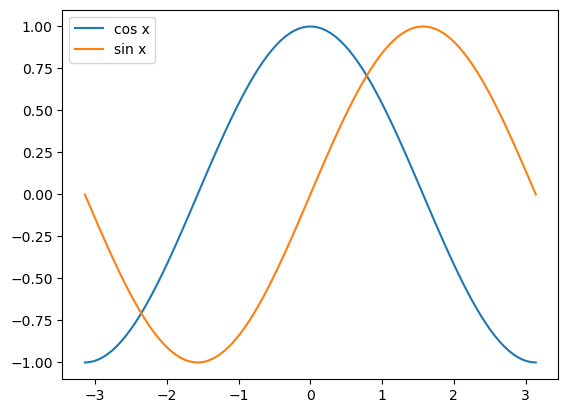

In [8]:
plt.plot(x, cos_x, label = "cos x")
plt.plot(x, sin_x, label = "sin x")
plt.legend()
plt.show()

### 1.3 Here comes the comparison

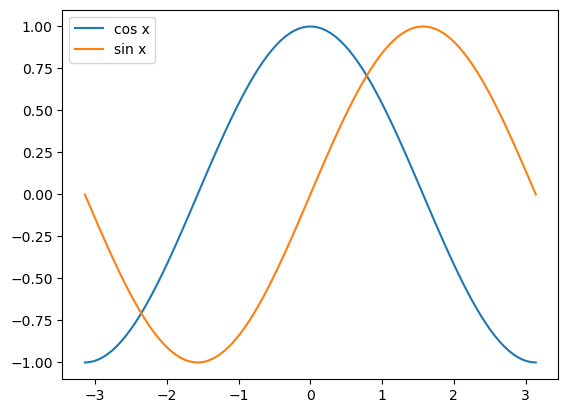

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 1) # Why does fig and ax actually do?
ax.plot(x, cos_x, label = "cos x")
ax.plot(x, sin_x, label = "sin x")
ax.legend()
plt.show()

## 2 Using the OO Interface

### 2.1 Getting ax

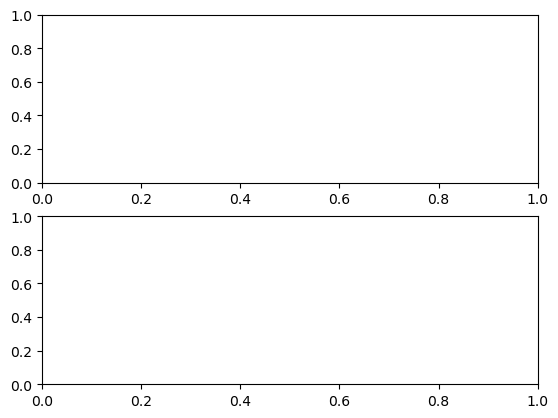

In [10]:
fig, ax = plt.subplots(ncols = 1, nrows = 2)

### 2.2 What is ax

In [11]:
type(ax) # But what is contained in this array?

numpy.ndarray

In [12]:
ax.shape

(2,)

In [13]:
type(ax[0]) # A bit confused as to what ax is indexing. 
# I am assuming each index is the number of sub-plots, depending on how many are made. 

matplotlib.axes._subplots.AxesSubplot

### 2.3 Plots in a column

In [14]:
ax[0].plot(x, cos_x, label = "cos x")

In [15]:
ax[1].plot(x, sin_x, label = "sin x") 

### 2.4 Legends

In [16]:
ax[0].legend()

In [17]:
ax[1].legend()

In [19]:
for a in ax:
    a.legend()
# Gives a warning that no labels are found?

In [20]:
for a in ax:
    a.legend()
    a.grid(alpha = .25)
# Same issue. 

# No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
# No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
# 

### 2.5 Tweaks

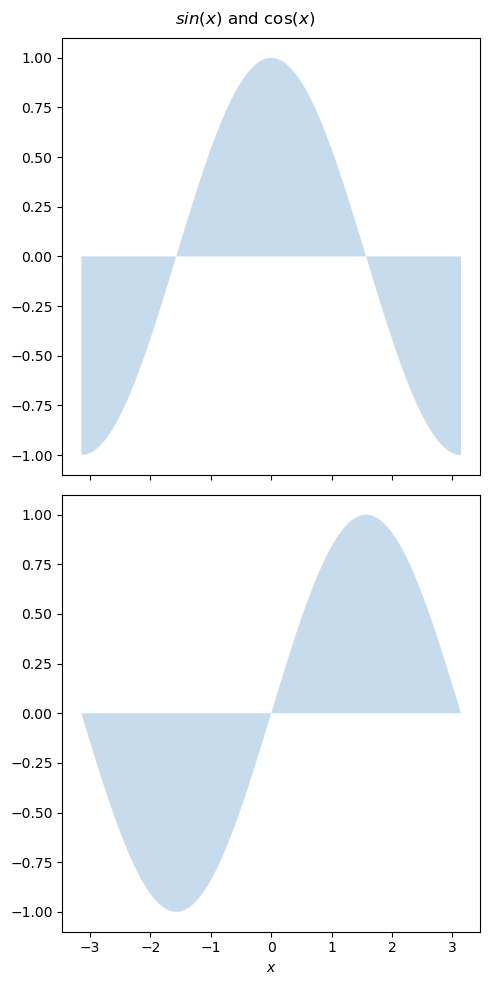

In [45]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (5, 10), sharex = True)
# What does sharex do?

ax[1].set_xlabel("$x$")

ax[0].fill_between(x, 0, cos_x, alpha = .25) # Literally fills the blank in between. 
ax[1].fill_between(x, 0, sin_x, alpha = .25)
fig.suptitle(r"$sin(x)$ and $\cos(x)$")
fig.tight_layout()
plt.show()

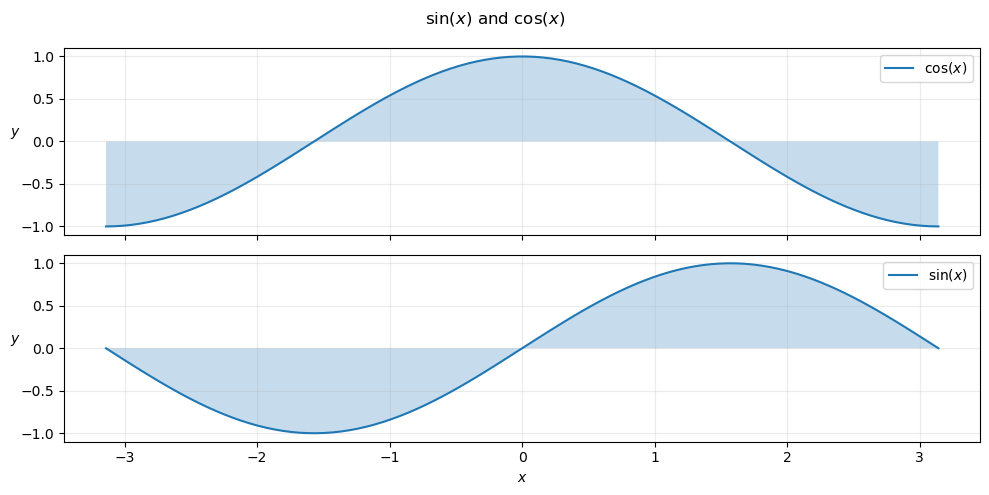

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), sharex = True)
ax[0].plot(x, cos_x, label = r"$\cos(x)$")
ax[0].fill_between(x, 0, cos_x, alpha = .25)
ax[1].plot(x, sin_x, label = r"$\sin(x)$")
ax[1].fill_between(x, 0, sin_x, alpha = .25)

for a in ax:
    a.legend()
    a.grid(alpha = .25)
    a.set_ylabel("$y$", rotation = 0)

ax[1].set_xlabel("$x$")
fig.suptitle(r"$\sin(x)$ and $\cos(x)$")
fig.tight_layout()

plt.show()

## 3 More rows and columns

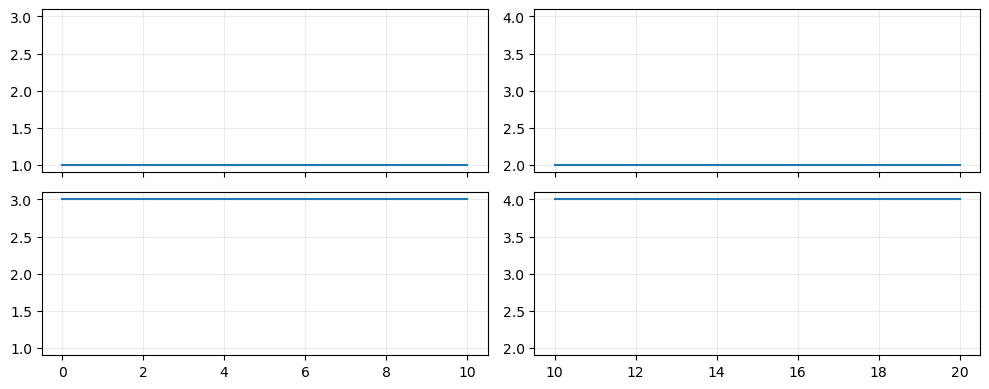

In [5]:
fig, ax = plt.subplots(nrows =2 , ncols = 2, figsize = (10, 4), sharex = "col", sharey = "col")

top_left, top_right, bottom_left, bottom_right = ax.flatten()

# From what I read flatten means reducing to 1D array, but I don't 
# really see how is this applied here. 

x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()

In [ ]:
ax.shape()
# Gives type error, tuple is not callable for some reason. 

### 3.1 Using ax

In [7]:
# Most direct way to access the correct axes:

ax[0, 0].plot(x1, np.ones_like(x1)) # Top left
ax[0, 1].plot(x2, 2*np.ones_like(x2)) # Top right
ax[1, 0].plot(x1, 3*np.ones_like(x1)) # Bottom left
ax[1, 1].plot(x2, 4**np.ones_like(x2)) # Bottom right

In [8]:
# Assigning the axes to a variable for simpler reference. 
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [9]:
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# But I really have no idea how does this work, how does flatten 
# know where to assign the variables to which exact portion?

### 3.2 Sharing axes

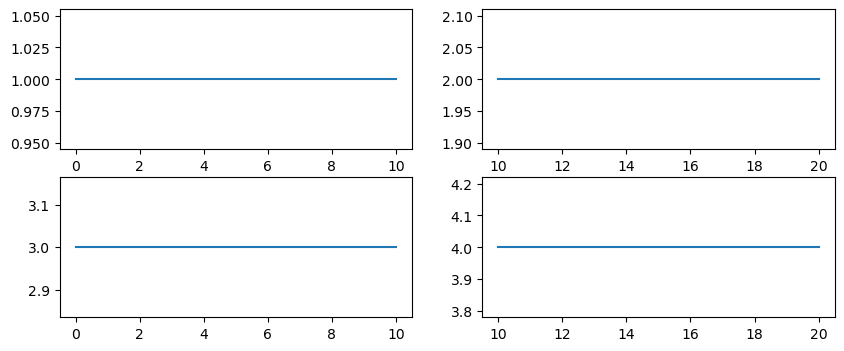

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 4))
ax[0, 0].plot(x1, np.ones_like(x1))
ax[0, 1].plot(x2, 2*np.ones_like(x2))
ax[1, 0].plot(x1, 3*np.ones_like(x1))
ax[1, 1].plot(x2, 4**np.ones_like(x2))
plt.show()

# matplotlib auto scales both axes
# I am guessing they will vary the x axis here so that the line is in 
# the center. 

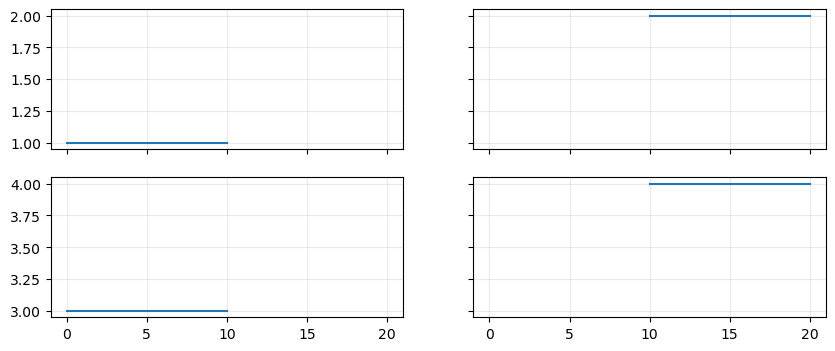

In [23]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 4), sharex = True, sharey = "row")
ax[0, 0].plot(x1, np.ones_like(x1))
ax[0, 1].plot(x2, 2*np.ones_like(x2))
ax[1, 0].plot(x1, 3*np.ones_like(x1))
ax[1, 1].plot(x2, 4**np.ones_like(x2))

top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

# True = every axe will share same range (0-20 for x. )
# Does it combine the largest range between x1 & x2 if use True??

# top_left.grid(alpha = .25)
# top_right.grid(alpha = .25)
# bottom_left.grid(alpha = .25)
# bottom_right.grid(alpha = .25)

# More efficient manner:
for a in ax.flatten():
    a.grid(alpha = .25)

### 3.3 Accessing all axes

In [ ]:
# Work located above. 

## 4 Other useful plots

### 4.1 Histograms

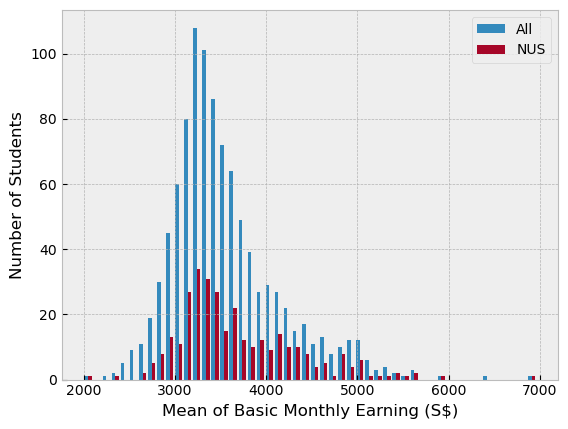

In [24]:
data = {}

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
data["All"] = np.loadtxt(filename, skiprows = 1)

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
data["NUS"] = np.loadtxt(filename, skiprows = 1)

plt.style.use("bmh")

# Should be the syntax for histogram, normally is plt.plot
plt.hist([data['All'], data['NUS']],
         bins=50,                        # How many bins to split the data
         label=['All', 'NUS']
         )

plt.xlabel("Mean of Basic Monthly Earning (S$)")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

### 4.2 Scatter plots

/var/folders/xl/66wk0yy56y5g6zdx76s3lt900000gn/T/ipykernel_1280/2836599617.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


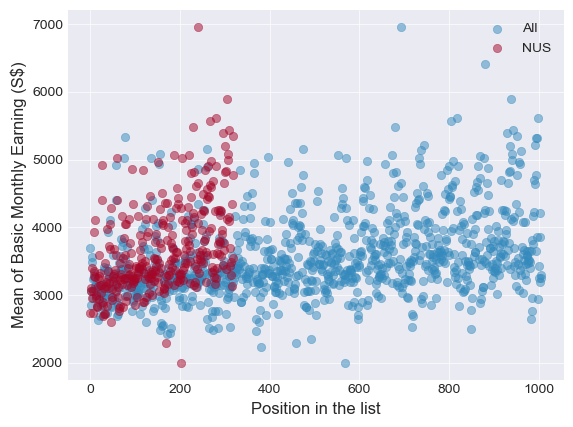

In [25]:
data = {}
for label in ['All', 'NUS']:
    filename = f'sg-gov-graduate-employment-survey_basic_monthly_mean_{label.lower()}.csv'
    data[label] = np.loadtxt(filename, skiprows=1)

plt.style.use('seaborn-darkgrid')

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Monthly Earning (S$)')
plt.legend()
plt.show()

# Gives a MatplotlibDeprecationWarning that the style has been deprecated. 

### 4.3 Bar charts

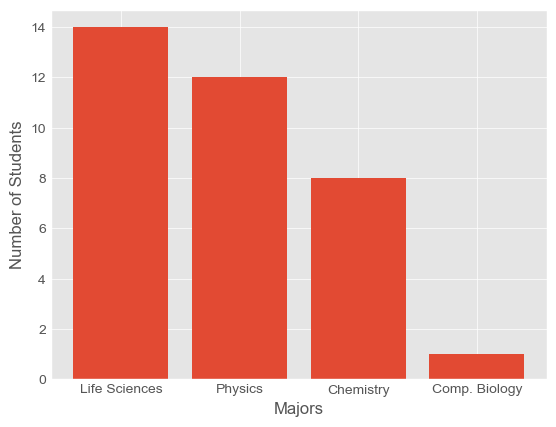

In [28]:
student_numbers = {"Life Sciences": 14, 
                   "Physics": 12,
                   "Chemistry": 8,
                   "Comp. Biology": 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use("ggplot")
plt.bar(majors, numbers)
plt.xlabel("Majors")
plt.ylabel("Number of Students")
plt.show()

# But this is not really object oriented plotting right?

### 4.4 Pie charts

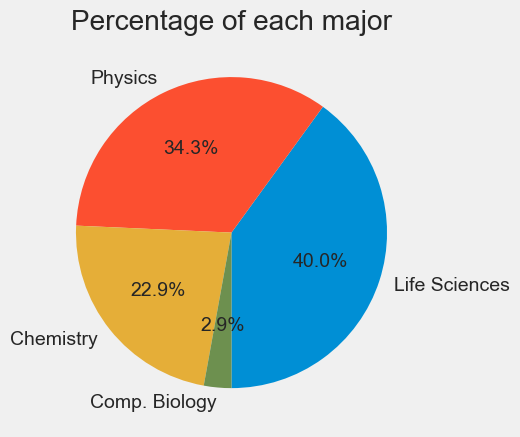

In [32]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use("fivethirtyeight")
plt.pie(numbers, 
       labels = majors,
       autopct = "%1.1f%%", # How to format the percentages
       startangle = -90)
plt.title("Percentage of each major")
plt.show()

# I don't really gets where does the start angle start from?

## Exercise 1 :  Plotting data from files

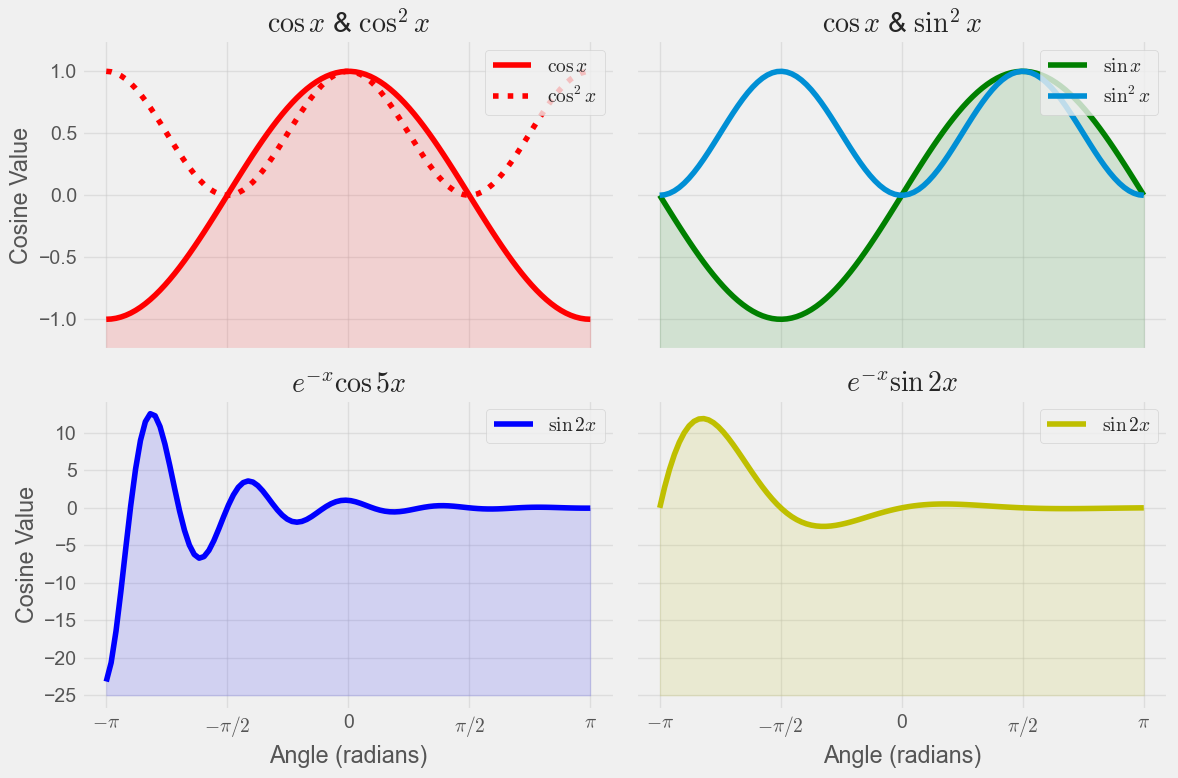

In [71]:
#--------- Generate cosine and sine values --------#
x = np.linspace(-np.pi, np.pi, num=100, endpoint=True)
cos_x = np.cos(x)
sin_x = np.sin(x)
fun1_x = np.exp(-x) * np.cos(5 * x)
fun2_x = np.exp(-x) * np.sin(2 * x)

#------- Plot the data -------#
fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(12, 8), sharex = "col", sharey='row')

#------- Subplot 1 -------#
axes[0, 0].plot(x, cos_x, color='r', label='$\cos x$')
axes[0, 0].plot(x, cos_x**2, color='r',
                linestyle=':', label='$\cos^2 x$')
axes[0, 0].set_title('$\cos x$ & $\cos^2x$')
axes[0, 0].set_ylabel('Cosine Value')
axes[0, 0].fill_between(x, cos_x, -3, color='r', alpha=.125)
axes[0, 0].legend(loc = "upper right", frameon = True)

# axes[0, 0].fill_between(x, cos_x, -1, color='r', alpha=.125)

#------- Subplot 2 -------#
axes[0, 1].plot(x, sin_x, color='g', label='$\sin x$')
axes[0, 1].fill_between(x, sin_x, -2, color='g', alpha=.125)
axes[0, 1].plot(x, sin_x**2, label='$\sin^2 x$')
axes[0, 1].set_title("$\cos x$ & $\sin^2 x$")
axes[0, 1].set_ylim(-1.25, 1.25)
axes[0, 1].legend(loc='upper right', frameon= True)

#------- Subplot 3 -------#
axes[1, 0].plot(x, fun1_x, color='b', label='$\sin 2x$')
axes[1, 0].fill_between(x, fun1_x, -25, color='b', alpha=.125)
axes[1, 0].set_title('$e^{-x}\cos 5x$')
axes[1, 0].set_xlabel('Angle (radians)')
axes[1, 0].set_ylabel('Cosine Value')
axes[1, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 0].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 0].legend(loc = "upper right", frameon = True)
axes[1, 0].set_yticks([-25, -20, -15, -10, -5, 0, 5, 10, 15])

#------- Subplot 4 -------#
axes[1, 1].plot(x, fun2_x, color='y', label=("$\sin 2x$"))
axes[1, 1].set_title('$e^{-x}\sin 2x$')
axes[1, 1].set_xlabel('Angle (radians)')
axes[1, 1].fill_between(x, fun2_x, -25, color='y', alpha=.125)
axes[1, 1].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 1].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 1].legend(loc = "upper right", frameon = True)

# 'flatten', 'opens' the 2D array into a simple 1D array
for a in axes.flatten():
    a.grid(alpha=.5)

plt.tight_layout()
plt.show()
# plt.tight_layout() seems to maximise the space of every subplot evenly in every given plot. 
# What is the difference between x ticks and x tick labels?